<a href="https://colab.research.google.com/github/lakshitgosain/Tensorflow-ZTM/blob/main/TF_ZTM_07_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLP Fundamentals in TF

Sequence-to-sequence
* One to one- Image Captioning
* Many to one- Sentiment analysis
* Many to one- time series forecasting
* many- to-many- Machine translation


In [1]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-c8cff312-ebbc-c4f7-6a64-89c9a478a6b0)


In [2]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2023-06-17 04:19:30--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.1’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-06-17 04:19:30 (98.1 MB/s) - ‘helper_functions.py.1’ saved [10246/10246]



In [3]:
from helper_functions import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys

In [4]:
!wget "https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip"

--2023-06-17 04:19:34--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.24.128, 142.250.4.128, 142.251.10.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.24.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip.1’

nlp_getting_started 100%[===================>] 593.11K   700KB/s    in 0.8s    

2023-06-17 04:19:35 (700 KB/s) - ‘nlp_getting_started.zip.1’ saved [607343/607343]



In [5]:
unzip_data("nlp_getting_started.zip")

## Visualize the dataset

To visualize the sample data, we need to read the in. On way is to use python.

Another way to do this is use pandas



In [6]:
import pandas as pd
train_df=pd.read_csv("train.csv")
test_df=pd.read_csv("test.csv")

In [7]:
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [8]:
train_data_shuffled=train_df.sample(frac=1, random_state=42)

In [9]:
train_data_shuffled

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0
...,...,...,...,...,...
5226,7470,obliteration,Merica!,@Eganator2000 There aren't many Obliteration s...,0
5390,7691,panic,NaN,just had a panic attack bc I don't have enough...,0
860,1242,blood,NaN,Omron HEM-712C Automatic Blood Pressure Monito...,0
7603,10862,NaN,NaN,Officials say a quarantine is in place at an A...,1


In [10]:
#Test dataframe looks like:
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [11]:
train_df.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [12]:
#How many total number of samples
len(train_df), len(test_df)

(7613, 3263)

In [13]:
#Let's visualize some random training samples
import random
random_index = random.randint(0,len(train_df)-5)
for row in train_data_shuffled[['text','target']][random_index:random_index+5].itertuples():
  _,text, target=row
  print(f"Target: {target}", "(real disaster)" if target >0 else "(not real disaster)")
  print(f"text:\n{text}\n")
  print("---\n")

Target: 0 (not real disaster)
text:
Lmao that light skin guy blew up on Twitter by talking about how ugly he was as a kid..

---

Target: 0 (not real disaster)
text:
I just screamed what the fuck is a hond

---

Target: 0 (not real disaster)
text:
So if I capsize on your thighs high tide B-5 you sunk my battleship
&gt;

---

Target: 0 (not real disaster)
text:
@zaynmalik don't overwork yourself. Your album is gonna be fire just don't overwork or stress! I love you take care

---

Target: 0 (not real disaster)
text:
Armageddon averted by El Patron
#UltimaLucha

---



### Split data into training and validation sets



In [14]:
from sklearn.model_selection import train_test_split

In [15]:
train_sentences, val_sentences, train_labels, val_labels=train_test_split(train_data_shuffled['text'].to_numpy(),
                                                                          train_data_shuffled['target'].to_numpy(),
                                                                          test_size=0.1,
                                                                          random_state=42)

In [16]:
#Check the lengths
len(train_sentences), len(train_labels), len(val_sentences), len(val_labels)

(6851, 6851, 762, 762)

## Converting words into numbers

First thing while building a model is to convert your text into numbers


Tokenization VS Embedding
Tkenization - word level and character level. Direct apping of a token.

Embedding - every word gets turned into a vector and we can define size of the vector. Embeddings can learn as our model trains



Text vectorization(tokenization)

In [17]:
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

In [18]:
#Use the default text vectorization parameters
text_vectoizer= TextVectorization(max_tokens=None, #Defines how many words in our vocab
                               standardize= "lower_and_strip_punctuation",
                               split="whitespace",
                               ngrams=None,
                               output_mode='int',
                               output_sequence_length=None) #how long do you want your sequences to be
                               #pad_to_max_tokens=True)

In [19]:
train_sentences[0].split()

['@mogacola', '@zamtriossu', 'i', 'screamed', 'after', 'hitting', 'tweet']

In [20]:
#Find the average number of tokens(words) in the training tweets
round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))

15

In [21]:
max_vocab_length= 10000 #max no of words to have in our vocab
max_length=15 #Max length our sequences will be (e.g. how many words from a Tweet does a model see)

text_vectorizer=TextVectorization(max_tokens=max_vocab_length,
                                     output_mode="int",
                                     output_sequence_length=max_length)

In [22]:
#Fit the text vectorizer to the training text
text_vectorizer.adapt(train_sentences)


In [23]:
train_sentences[:10]

array(['@mogacola @zamtriossu i screamed after hitting tweet',
       'Imagine getting flattened by Kurt Zouma',
       '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
       "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
       'Somehow find you and I collide http://t.co/Ee8RpOahPk',
       '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
       'destroy the free fandom honestly',
       'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
       '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
       'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
      dtype=object)

In [24]:
#Create a sample sentence and tokenize it
sample_sentence="There is a floow in my street!"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[ 74,   9,   3,   1,   4,  13, 698,   0,   0,   0,   0,   0,   0,
          0,   0]])>

In [25]:
random_sentence=random.choice(train_sentences)
print(random_sentence)
vectorized_random_sentence=text_vectorizer([random_sentence])
print(f"Random Sentence: {random_sentence}\nVectoized Random Sentence: {vectorized_random_sentence}")

catastrophic-fallen-angel: reveillertm: macabrelolita: I was supposed to write Û÷amino acidsÛª and I nearly... http://t.co/dIoBzGHFju
Random Sentence: catastrophic-fallen-angel: reveillertm: macabrelolita: I was supposed to write Û÷amino acidsÛª and I nearly... http://t.co/dIoBzGHFju
Vectoized Random Sentence: [[   1 9117    1    8   23 1463    5 1917 6429    1    7    8  841    1
     0]]


In [26]:
words_in_vocab=text_vectorizer.get_vocabulary()
top_5_words=words_in_vocab[:5]
botton_5_words=words_in_vocab[-5:]

In [27]:
words_in_vocab,top_5_words,botton_5_words

(['',
  '[UNK]',
  'the',
  'a',
  'in',
  'to',
  'of',
  'and',
  'i',
  'is',
  'for',
  'on',
  'you',
  'my',
  'with',
  'it',
  'that',
  'at',
  'by',
  'this',
  'from',
  'be',
  'are',
  'was',
  'have',
  'like',
  'as',
  'up',
  'so',
  'just',
  'but',
  'me',
  'im',
  'your',
  'not',
  'amp',
  'out',
  'its',
  'will',
  'an',
  'no',
  'has',
  'fire',
  'after',
  'all',
  'when',
  'we',
  'if',
  'now',
  'via',
  'new',
  'more',
  'get',
  'or',
  'about',
  'what',
  'he',
  'people',
  'news',
  'been',
  'over',
  'one',
  'how',
  'dont',
  'they',
  'who',
  'into',
  'were',
  'do',
  'us',
  '2',
  'can',
  'video',
  'emergency',
  'there',
  'disaster',
  'than',
  'police',
  'would',
  'his',
  'still',
  'her',
  'some',
  'body',
  'storm',
  'crash',
  'burning',
  'suicide',
  'back',
  'man',
  'california',
  'why',
  'time',
  'them',
  'had',
  'buildings',
  'rt',
  'first',
  'cant',
  'see',
  'got',
  'day',
  'off',
  'our',
  'going',
 

### Creating an embedding using an embedding layer

To make our embedding, we're going to use the TF's embedding layer.

The parameters we care the most about our embedding layers are:
* input_dim= sie of our vocab
* output_dim= size of the output embedding vector. A value of a 100 will mean that each token will be represented as a vector of 100 long length
* input_length= length of sequences being passed to the embedding layer
*

In [28]:
from tensorflow.keras import layers

In [29]:
embedding=layers.Embedding(input_dim=max_vocab_length,
                           output_dim=128,
                           input_length=max_length)

In [30]:
embedding

In [31]:
#Get a random sentence from the training set
random_sentence=random.choice(train_sentences)
print(f"Original Sentence:{random_sentence}\
      \nEmbedded Sentence")

sample_embedding=embedding(text_vectorizer([random_sentence]))
sample_embedding

Original Sentence:Bluedio Turbine Hurricane H Bluetooth 4.1 Wireless Stereo Headphones Headset BLK - Full reÛ_ http://t.co/WeUDLkc4o4 http://t.co/trl1dskF81      
Embedded Sentence


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[-7.5580850e-03, -3.3151068e-02, -6.4847842e-03, ...,
         -2.3289109e-02,  2.7769897e-02,  2.0428982e-02],
        [ 4.3598786e-03,  3.6121372e-02,  1.1861347e-02, ...,
         -4.4446230e-02, -6.2571391e-03,  9.9399686e-03],
        [-6.2232129e-03,  3.4715068e-02, -2.7298704e-03, ...,
          2.1669362e-02,  3.4684684e-02, -4.7717154e-02],
        ...,
        [-2.1747053e-02, -3.4965575e-05, -8.9477524e-03, ...,
          3.2201890e-02,  2.7319375e-02, -1.3037540e-02],
        [-2.0786524e-02,  2.1357086e-02, -4.0223885e-02, ...,
          4.5343880e-02,  4.1947354e-02, -4.4432949e-02],
        [-2.0786524e-02,  2.1357086e-02, -4.0223885e-02, ...,
          4.5343880e-02,  4.1947354e-02, -4.4432949e-02]]], dtype=float32)>

In [32]:
#Check out a single token's embedding
sample_embedding[0][0], sample_embedding[0][0].shape, random_sentence[0]

(<tf.Tensor: shape=(128,), dtype=float32, numpy=
 array([-7.55808502e-03, -3.31510678e-02, -6.48478419e-03, -5.96556813e-03,
        -3.59295122e-02, -2.78921966e-02,  7.63517618e-03, -1.99476127e-02,
         3.10974009e-02, -1.67658180e-03, -1.31419525e-02,  1.97634958e-02,
        -3.29667106e-02,  4.74361815e-02,  4.29836661e-03, -2.26278231e-03,
         1.71732418e-02, -1.21700987e-02,  2.98037641e-02,  1.06105208e-02,
         4.30832766e-02, -4.70493808e-02,  1.43727921e-02, -1.00178607e-02,
         3.76285203e-02,  3.69115956e-02,  2.47030519e-02,  3.52167152e-02,
         7.50090927e-03, -1.68534294e-02,  2.34817341e-03, -3.07986494e-02,
         3.58474739e-02,  7.69631937e-03, -3.37794647e-02,  4.98376377e-02,
         3.87169458e-02,  4.51937057e-02, -2.01298837e-02,  1.92135014e-02,
         2.14891545e-02, -1.61392465e-02,  2.29170211e-02, -3.83401886e-02,
        -2.57441532e-02, -2.90279035e-02, -1.24157891e-02, -3.99810560e-02,
        -3.24310437e-02,  2.79830955e-0

##Modelling a text dataset(running a series of experiments)

* Model 0: Naive Bayes with Tokenization
* Model 1: Feed-forward Neural Network(Dense Model)
* Model 2: LSTM Model(RNN)
* Model 3: GRU Model
* Moel 4: Bidirectional LSTM
* Model 5 : 1D Convolutional Layer
* model 6: Tensorflow hub pretrained feature extraction (using transfer learning)
* Model 7 : Same as model 6 with 10% of data

How are we going to approach all of these:
Use the standard steps in modelling with tensorflow

* Create->build->fit->Evaluate



### Model 0

To create a baseline, we'll use sklearn's Naive Bayes using Tf-IDF to convert our words to numbers

It is a good practice to use non-DL Algos as a baseline because of their speed and then later use DL to see if you can improve upon them

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [34]:
model_0=Pipeline([
    ("tfidf",TfidfVectorizer()),
    ("clf",MultinomialNB())
])

model_0.fit(train_sentences, train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [35]:
#Evaluate the baseline Model
baseline_score = model_0.score(val_sentences, val_labels)
print(f"our baseline model achieves an accuracy of : {baseline_score*100:.2f}%")

our baseline model achieves an accuracy of : 79.27%


In [36]:
train_df.target.value_counts

<bound method IndexOpsMixin.value_counts of 0       1
1       1
2       1
3       1
4       1
       ..
7608    1
7609    1
7610    1
7611    1
7612    1
Name: target, Length: 7613, dtype: int64>

In [37]:
#Make predictions
baseline_preds= model_0.predict(val_sentences)
baseline_preds[:20]

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1])

### Create an evaluation function for our model experiments

We could evaluate all of our model's predictions with different metrics every time.
Calculate:
* Accuracy
* Precision
* Recall
* F1 score


In [38]:
#Function to evaluate the above metrics
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  """
  Calculated model accuracy, precision, recall and f1 score of a binary classification model
  """
  #Calculate model accuracy
  model_accuracy=accuracy_score(y_true, y_pred) * 100
  #Calculate model precision, recall and f1 score using the"weighted average"
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred,average="weighted" )
  model_results={'accuracy':model_accuracy,
                 'precision': model_precision,
                 'recall': model_recall,
                 'f1-score':model_f1}
  return model_results

In [39]:
#Get baseline results
baseline_results=calculate_results(y_true=val_labels,
                                   y_pred=baseline_preds)

In [40]:
baseline_results['accuracy']

79.26509186351706

In [41]:
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1-score': 0.7862189758049549}

## Model 1: A simple Dense Model

In [42]:
#Create a tensorflow callback
from helper_functions import create_tensorboard_callback

#Create a directory to save tensorboard logs
SAVE_DIR="model_logs"


In [43]:
#Build model with functional API
from tensorflow.keras import layers

inputs=layers.Input(shape=(1,), dtype=tf.string) #Inputs are 1 dimensional
x= text_vectorizer(inputs) #Turn the input text into numbers
x= embedding(x) #Create an embedding of vctorized embeddings
x=layers.GlobalAveragePooling1D()(x)
outputs=layers.Dense(1, activation='sigmoid')(x)

model_1=tf.keras.Model(inputs, outputs, name="Model_1_dense")

In [44]:
model_1.summary()

Model: "Model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

In [45]:
#Compile model
model_1.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [46]:
model_1_history=model_1.fit(x=train_sentences,
                            y=train_labels,
                            epochs=5,
                            validation_data=(val_sentences,val_labels),
                            callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                   experiment_name="model_1_dense")])

Saving TensorBoard log files to: model_logs/model_1_dense/20230617-041938
Epoch 1/5
215/215 [==============================] - 33s 138ms/step - loss: 0.6119 - accuracy: 0.6887 - val_loss: 0.5345 - val_accuracy: 0.7625
Epoch 2/5
215/215 [==============================] - 5s 23ms/step - loss: 0.4434 - accuracy: 0.8183 - val_loss: 0.4725 - val_accuracy: 0.7874
Epoch 3/5
215/215 [==============================] - 4s 20ms/step - loss: 0.3491 - accuracy: 0.8591 - val_loss: 0.4584 - val_accuracy: 0.7913
Epoch 4/5
215/215 [==============================] - 5s 24ms/step - loss: 0.2859 - accuracy: 0.8892 - val_loss: 0.4625 - val_accuracy: 0.7848
Epoch 5/5
215/215 [==============================] - 4s 19ms/step - loss: 0.2393 - accuracy: 0.9121 - val_loss: 0.4866 - val_accuracy: 0.7874


In [47]:
model_1.evaluate(val_sentences, val_labels)

24/24 [==============================] - 0s 3ms/step - loss: 0.4866 - accuracy: 0.7874


[0.4866436719894409, 0.787401556968689]

In [48]:
model_1_pred_probs=model_1.predict(val_sentences)

24/24 [==============================] - 0s 3ms/step


In [49]:
model_1_pred_probs.shape

(762, 1)

In [50]:
#calculate_results(val_labels, model_1_pred_probs)

In [51]:
val_labels

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,

In [52]:
#Convert Model_prediction Probabs into label formats
model_1_preds=tf.squeeze(tf.round(model_1_pred_probs))

In [53]:
model_1_preds

<tf.Tensor: shape=(762,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1.,
       0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0.,
       1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0.,
       0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0

In [54]:
model_1_results=calculate_results(y_true=val_labels,
                                  y_pred=model_1_preds)

In [55]:
model_1_results

{'accuracy': 78.74015748031496,
 'precision': 0.7952890169870324,
 'recall': 0.7874015748031497,
 'f1-score': 0.7834758226606451}

In [56]:
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1-score': 0.7862189758049549}

In [57]:
import numpy as np
np.array(list(model_1_results.values()))> np.array(list(baseline_results.values()))

array([False, False, False, False])

## Visualize the learned embeddings


In [58]:
#Get the vocabulary from the text vectorization layer
words_in_vocab = text_vectorizer.get_vocabulary()

In [59]:
len(words_in_vocab), words_in_vocab[:10]

(10000, ['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is'])

In [60]:
# Model 1 summary
model_1.summary()

Model: "Model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

In [61]:
#Get the weight matrix of the embedding layers
#These are numerical representation of our numerical datawhich are trained for 5 epochs

embed_weights=model_1.get_layer("embedding").get_weights()[0]
embed_weights

array([[ 0.04639365, -0.00425685, -0.0058459 , ...,  0.01861798,
        -0.00898123, -0.02822156],
       [-0.00832366,  0.03336032, -0.03449535, ...,  0.03449606,
         0.03056703, -0.05740191],
       [-0.01224537, -0.02599777, -0.01307229, ..., -0.04689934,
        -0.02821775, -0.0225463 ],
       ...,
       [-0.02350407,  0.00194113, -0.01120711, ..., -0.02893713,
         0.04752084, -0.03119372],
       [ 0.01748386, -0.00923529,  0.01836829, ..., -0.06523332,
        -0.07976959, -0.01253115],
       [ 0.04014959,  0.06424671,  0.05911784, ..., -0.10467663,
        -0.06407124, -0.0478763 ]], dtype=float32)

In [62]:
print(embed_weights.shape)

(10000, 128)


Now we've got the embedding matrix our model has learned to represent tokens, let's see how we can visualize it

To do so, tensorflow has a tool called Projector

In [63]:
# # Code below is adapted from: https://www.tensorflow.org/tutorials/text/word_embeddings#retrieve_the_trained_word_embeddings_and_save_them_to_disk
import io

# Create output writers
out_v = io.open("embedding_vectors.tsv", "w", encoding="utf-8")
out_m = io.open("embedding_metadata.tsv", "w", encoding="utf-8")

# Write embedding vectors and words to file
for num, word in enumerate(words_in_vocab):
  if num == 0:
     continue # skip padding token
  vec = embed_weights[num]
  out_m.write(word + "\n") # write words to file
  out_v.write("\t".join([str(x) for x in vec]) + "\n") # write corresponding word vector to file
out_v.close()
out_m.close()

In [64]:
# Download files locally to upload to Embedding Projector
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download("embedding_vectors.tsv")
  files.download("embedding_metadata.tsv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Recurrent Neural Networks(RNNs)

the premise of the Recurrent Neural Networs is to use the representation of the previous input to aid the representation of the later input

RNNs are used for sequence data (this example is a sequence of text)

 📖 Resources:

MIT Deep Learning Lecture on Recurrent Neural Networks - explains the background of recurrent neural networks and introduces LSTMs.
The Unreasonable Effectiveness of Recurrent Neural Networks by Andrej Karpathy - demonstrates the power of RNN's with examples generating various sequences.
Understanding LSTMs by Chris Olah - an in-depth (and technical) look at the mechanics of the LSTM cell, possibly the most popular RNN building block.

### Model 2: LSTM

LSTM= long short term memory

Our structure of an RNN Looks like this

Input(text)-> Tokenize -> Embedding -> Layers(RNNs/Dense)->output(label probability)

In [65]:
#Create an LSTM Model
from tensorflow.keras import layers
inputs= layers.Input(shape=(1,), dtype=tf.string)
x=text_vectorizer(inputs)
x= embedding(x)
print(x.shape)
x=layers.LSTM(64, return_sequences=True)(x) #64 is hidden units
#When you a stacking RNN Cells together, you need to return sequences=true
print(x.shape)
x= layers.LSTM(64)(x)
print(x.shape)
x= layers.Dense(64, activation='relu')(x)
print(x.shape)
outputs=layers.Dense(1, activation='sigmoid')(x)

model_2= tf.keras.Model(inputs, outputs, name="model_2_LSTM")


(None, 15, 128)
(None, 15, 64)
(None, 64)
(None, 64)


In [66]:
#Create an LSTM Model
from tensorflow.keras import layers
inputs= layers.Input(shape=(1,), dtype=tf.string)
x=text_vectorizer(inputs)
x= embedding(x)
#print(x.shape)
#x=layers.LSTM(64, return_sequences=True)(x) #64 is hidden units
#When you a stacking RNN Cells together, you need to return sequences=true
#print(x.shape)
x= layers.LSTM(64)(x)
#print(x.shape)
#x= layers.Dense(64, activation='relu')(x)
#print(x.shape)
outputs=layers.Dense(1, activation='sigmoid')(x)

model_2= tf.keras.Model(inputs, outputs, name="model_2_LSTM")


In [67]:
model_2.summary()

Model: "model_2_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,329,473
Trainable params: 1,329,473
Non-trainable params: 0
____________________________________________

###The default activation function for RNNs is TanH

In [68]:
#Complie the model
model_2.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [69]:
history_model_2_LSTM=model_2.fit(train_sentences,
                                 train_labels,
                                 epochs=5,
                                 validation_data=(val_sentences, val_labels),
                                 callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                        experiment_name="model_2_LSTM")])

Saving TensorBoard log files to: model_logs/model_2_LSTM/20230617-042104
Epoch 1/5
215/215 [==============================] - 24s 71ms/step - loss: 0.2241 - accuracy: 0.9212 - val_loss: 0.5227 - val_accuracy: 0.7835
Epoch 2/5
215/215 [==============================] - 4s 20ms/step - loss: 0.1579 - accuracy: 0.9423 - val_loss: 0.5741 - val_accuracy: 0.7835
Epoch 3/5
215/215 [==============================] - 3s 12ms/step - loss: 0.1292 - accuracy: 0.9505 - val_loss: 0.6151 - val_accuracy: 0.7782
Epoch 4/5
215/215 [==============================] - 3s 14ms/step - loss: 0.1057 - accuracy: 0.9603 - val_loss: 0.8725 - val_accuracy: 0.7808
Epoch 5/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0840 - accuracy: 0.9656 - val_loss: 0.9455 - val_accuracy: 0.7743


In [70]:
model_2_pred_probs=model_2.predict(val_sentences)
model_2_pred_probs[:10]

24/24 [==============================] - 0s 3ms/step


array([[1.9279160e-02],
       [9.3277431e-01],
       [9.9986005e-01],
       [5.4312073e-02],
       [6.0018071e-04],
       [9.9944550e-01],
       [8.5512459e-01],
       [9.9989760e-01],
       [9.9984968e-01],
       [7.0770234e-01]], dtype=float32)

In [71]:
#Convert the probabs to pred
model_2_preds=tf.squeeze(tf.round(model_2_pred_probs))

In [72]:
model_2_preds


<tf.Tensor: shape=(762,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0.,
       1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1.,
       0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0.,
       1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0.,
       0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0

In [73]:
model_2_results=calculate_results(y_true=val_labels,
                                  y_pred=model_2_preds)

In [74]:
model_2_results

{'accuracy': 77.42782152230971,
 'precision': 0.7759894665484696,
 'recall': 0.7742782152230971,
 'f1-score': 0.7722311836526509}

In [75]:
baseline_results


{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1-score': 0.7862189758049549}

### Model 3: GRU

Similar to LSTM but has less params

In [76]:
from tensorflow.keras import layers
inputs= tf.keras.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)

x=embedding(x)

x = tf.keras.layers.GRU(64, return_sequences=True)(x) #if you want to stack recurrent layers on top of each other, you need to use return_sequences=True
x=layers.LSTM(64, return_sequences=True)(x)
x=layers.GRU(64)(x)

x=layers.Dense(64, activation='relu')(x)
outputs=layers.Dense(1, activation='sigmoid')(x)
model_3=tf.keras.Model(inputs, outputs, name="Model_3_GRU")


In [77]:
from tensorflow.keras import layers
inputs= tf.keras.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)

x=embedding(x)

x = tf.keras.layers.GRU(64)(x) #if you want to stack recurrent layers on top of each other, you need to use return_sequences=True
#x=layers.LSTM(64, return_sequences=True)(x)
#x=layers.GRU(64)(x)

x=layers.Dense(64, activation='relu')(x)
outputs=layers.Dense(1, activation='sigmoid')(x)
model_3=tf.keras.Model(inputs, outputs, name="Model_3_GRU")


In [78]:
model_3.summary()

Model: "Model_3_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 gru_2 (GRU)                 (None, 64)                37248     
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                       

In [79]:
model_3.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [80]:
history_model_3_GRU=model_3.fit(train_sentences,
                                train_labels,
                                validation_data=(val_sentences, val_labels),
                                epochs=5,
                                callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                      experiment_name='model_name_GRU')])

Saving TensorBoard log files to: model_logs/model_name_GRU/20230617-042141
Epoch 1/5
215/215 [==============================] - 16s 60ms/step - loss: 0.1736 - accuracy: 0.9291 - val_loss: 0.7101 - val_accuracy: 0.7808
Epoch 2/5
215/215 [==============================] - 4s 17ms/step - loss: 0.0818 - accuracy: 0.9682 - val_loss: 0.8873 - val_accuracy: 0.7808
Epoch 3/5
215/215 [==============================] - 3s 16ms/step - loss: 0.0659 - accuracy: 0.9717 - val_loss: 1.2823 - val_accuracy: 0.7769
Epoch 4/5
215/215 [==============================] - 2s 10ms/step - loss: 0.0568 - accuracy: 0.9764 - val_loss: 1.3370 - val_accuracy: 0.7743
Epoch 5/5
215/215 [==============================] - 2s 10ms/step - loss: 0.0506 - accuracy: 0.9766 - val_loss: 1.5760 - val_accuracy: 0.7756


In [81]:
model_3_pred_probs=model_3.predict(val_sentences)
model_3_pred_probs[:10]

24/24 [==============================] - 0s 3ms/step


array([[1.3250248e-04],
       [8.2421100e-01],
       [9.9997103e-01],
       [2.7224673e-02],
       [2.9768021e-06],
       [9.9931490e-01],
       [6.1515782e-02],
       [9.9998903e-01],
       [9.9996090e-01],
       [4.0234429e-01]], dtype=float32)

In [82]:
model_3_preds=tf.squeeze(tf.round(model_3_pred_probs))
model_3_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 0., 1., 1., 0.], dtype=float32)>

In [145]:
model_3_results=calculate_results(y_true=val_labels,
                  y_pred=model_3_preds)

In [84]:
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1-score': 0.7862189758049549}

### Model_4 : Bidirectional LSTM

Normal RNNs go from left to right..
Bidirectional RNNs go from left to right as well as right to left




In [85]:
from tensorflow.keras import layers
inputs=layers.Input(shape=(1,), dtype=tf.string)
x= text_vectorizer(inputs)

x= embedding(x)

x=layers.Bidirectional(layers.LSTM(64))(x)
#print(x.shape) #Doubles the value of the shape...as the cell is bidirectional
#x=layers.Bidirectional(layers.GRU(64))(x)

outputs=layers.Dense(1, activation='sigmoid')(x)

model_4=tf.keras.Model(inputs, outputs, name='model_4_bidirectional')

In [86]:
model_4.summary()

Model: "model_4_bidirectional"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 bidirectional (Bidirectiona  (None, 128)              98816     
 l)                                                              
                                                                 
 dense_8 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,378,945
Trainable params: 1,3

In [87]:
model_4.compile(loss='binary_crossentropy',
                metrics=['accuracy'],
                optimizer=tf.keras.optimizers.Adam())

In [88]:
history_4_bidirectional=model_4.fit(train_sentences,
                                    train_labels,
                                    validation_data=(val_sentences, val_labels),
                                    epochs=5,
                                    callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                           experiment_name='model_4_bidirectional')])

Saving TensorBoard log files to: model_logs/model_4_bidirectional/20230617-042225
Epoch 1/5
215/215 [==============================] - 20s 69ms/step - loss: 0.1098 - accuracy: 0.9656 - val_loss: 1.0226 - val_accuracy: 0.7703
Epoch 2/5
215/215 [==============================] - 4s 18ms/step - loss: 0.0521 - accuracy: 0.9772 - val_loss: 1.0867 - val_accuracy: 0.7717
Epoch 3/5
215/215 [==============================] - 3s 15ms/step - loss: 0.0448 - accuracy: 0.9790 - val_loss: 1.2189 - val_accuracy: 0.7730
Epoch 4/5
215/215 [==============================] - 3s 12ms/step - loss: 0.0450 - accuracy: 0.9799 - val_loss: 1.2579 - val_accuracy: 0.7625
Epoch 5/5
215/215 [==============================] - 2s 10ms/step - loss: 0.0402 - accuracy: 0.9806 - val_loss: 1.4292 - val_accuracy: 0.7782


In [89]:
model_4_pred_probs=model_4.predict(val_sentences)
model_4_pred_probs[:10]

24/24 [==============================] - 1s 4ms/step


array([[1.2142494e-01],
       [6.5166271e-01],
       [9.9999189e-01],
       [2.5688884e-01],
       [5.3289965e-05],
       [9.9987614e-01],
       [6.8735951e-01],
       [9.9999595e-01],
       [9.9999309e-01],
       [9.9806184e-01]], dtype=float32)

In [90]:
model_4_preds=tf.squeeze(tf.round(model_4_pred_probs))
model_4_preds

<tf.Tensor: shape=(762,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0.,
       1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0.,
       1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0.,
       0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0

In [91]:
model_4_results=calculate_results(y_true=val_labels,
                y_pred=model_4_preds)

In [92]:
model_4_results

{'accuracy': 77.82152230971128,
 'precision': 0.7794151013007613,
 'recall': 0.7782152230971129,
 'f1-score': 0.7765058443845926}

In [93]:
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1-score': 0.7862189758049549}

## Convolutional Neural Networks for text and other types of sequences

We've used CNN for images bit typically images are 2D(HxW)...however the text data is 1D

previously we used Conv2D for our image data...but now we will use conv1d

Typical structure of Conv1D model for sequences :

Inputs(text)-> tokenization-> embedding-> layers(Conv1D)->Pooling-> Output(class Probabs)

### Model 5: Conv1D

In [94]:
from tensorflow.keras import layers

embedding_test=embedding(text_vectorizer(["THis is a test sentence"]))
conv1d= layers.Conv1D(filters=32,
                      kernel_size=5,
                      activation='relu',
                      padding='valid') #Default=valid, the outpus is smaller than the 'same' shape than the input

conv_1d_output=conv1d(embedding_test)
max_pool=layers.GlobalMaxPool1D()
max_pool_output=max_pool(conv_1d_output) #Get the mot imporetant features...get the feature with hightest value

embedding_test.shape, conv_1d_output.shape, max_pool_output.shape

(TensorShape([1, 15, 128]), TensorShape([1, 11, 32]), TensorShape([1, 32]))

In [95]:
#Where is the 11 coming from. THis is because we are using padding as valid and kernel size as 5

In [96]:
embedding_test

<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[-0.03222757,  0.02307181, -0.01385835, ...,  0.01608749,
         -0.03466342, -0.05507896],
        [ 0.00948064,  0.02890947, -0.0157517 , ...,  0.01041117,
          0.04778346, -0.04333053],
        [ 0.01150913,  0.04150007,  0.0030097 , ...,  0.01878862,
         -0.03257723, -0.05333283],
        ...,
        [ 0.01600279, -0.00266789,  0.0018959 , ...,  0.02919514,
         -0.0020319 , -0.01676903],
        [ 0.01600279, -0.00266789,  0.0018959 , ...,  0.02919514,
         -0.0020319 , -0.01676903],
        [ 0.01600279, -0.00266789,  0.0018959 , ...,  0.02919514,
         -0.0020319 , -0.01676903]]], dtype=float32)>

In [97]:
conv_1d_output

<tf.Tensor: shape=(1, 11, 32), dtype=float32, numpy=
array([[[0.        , 0.        , 0.        , 0.        , 0.08637103,
         0.06598052, 0.03108212, 0.        , 0.06123593, 0.05022851,
         0.00388112, 0.        , 0.        , 0.        , 0.        ,
         0.01553611, 0.05085507, 0.03817522, 0.        , 0.        ,
         0.        , 0.04697706, 0.02625585, 0.02888207, 0.0948526 ,
         0.        , 0.0543611 , 0.        , 0.04842124, 0.01253425,
         0.        , 0.        ],
        [0.04182441, 0.04007557, 0.0132966 , 0.03003826, 0.        ,
         0.03016315, 0.        , 0.        , 0.01618664, 0.0091231 ,
         0.        , 0.08178469, 0.        , 0.052497  , 0.04473214,
         0.        , 0.        , 0.0572531 , 0.        , 0.        ,
         0.        , 0.05269448, 0.01056402, 0.        , 0.        ,
         0.        , 0.00928992, 0.        , 0.        , 0.        ,
         0.        , 0.        ],
        [0.01166761, 0.        , 0.03375591, 0.    

In [98]:
max_pool_output

<tf.Tensor: shape=(1, 32), dtype=float32, numpy=
array([[0.04182441, 0.04007557, 0.03375591, 0.03003826, 0.08637103,
        0.06598052, 0.03108212, 0.0340161 , 0.06123593, 0.05022851,
        0.01111539, 0.08178469, 0.00420705, 0.06425364, 0.04473214,
        0.01553611, 0.05085507, 0.0642417 , 0.        , 0.02875374,
        0.03470616, 0.05491918, 0.02625585, 0.02888207, 0.0948526 ,
        0.        , 0.0691933 , 0.0052118 , 0.04842124, 0.01253425,
        0.        , 0.0424952 ]], dtype=float32)>

In [99]:
from tensorflow.keras import layers

inputs= layers.Input(shape=(1,),dtype=tf.string)
x= text_vectorizer(inputs)
x= embedding(x)

x= layers.Conv1D(filters=64,
                 kernel_size=5,
                 strides=1,
                 activation='relu',
                 padding='valid')(x)

x= layers.GlobalMaxPool1D()(x)

outputs=layers.Dense(1, activation='sigmoid')(x)
model_5=tf.keras.Model(inputs, outputs,name='model_5_conv_1_d')

In [100]:
model_5.summary()

Model: "model_5_conv_1_d"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 conv1d_1 (Conv1D)           (None, 11, 64)            41024     
                                                                 
 global_max_pooling1d_1 (Glo  (None, 64)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_9 (Dense)             (None, 1)            

In [101]:
model_5.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [102]:
model_5_history_Conv1D=model_5.fit(train_sentences,
                                   train_labels,
                                   validation_data=(val_sentences, val_labels),
                                   epochs=5,
                                   callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                          experiment_name="model_5_Conv1D")])

Saving TensorBoard log files to: model_logs/model_5_Conv1D/20230617-042315
Epoch 1/5
215/215 [==============================] - 16s 60ms/step - loss: 0.1222 - accuracy: 0.9585 - val_loss: 0.9516 - val_accuracy: 0.7717
Epoch 2/5
215/215 [==============================] - 4s 17ms/step - loss: 0.0758 - accuracy: 0.9721 - val_loss: 1.0588 - val_accuracy: 0.7677
Epoch 3/5
215/215 [==============================] - 2s 11ms/step - loss: 0.0625 - accuracy: 0.9765 - val_loss: 1.1392 - val_accuracy: 0.7677
Epoch 4/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0561 - accuracy: 0.9777 - val_loss: 1.1604 - val_accuracy: 0.7703
Epoch 5/5
215/215 [==============================] - 1s 6ms/step - loss: 0.0507 - accuracy: 0.9784 - val_loss: 1.2255 - val_accuracy: 0.7559


In [103]:
model_5_pred_probs=model_5.predict(val_sentences)
model_5_pred_probs

24/24 [==============================] - 0s 3ms/step


array([[3.21557730e-01],
       [8.87807608e-01],
       [9.99963641e-01],
       [4.32081968e-02],
       [2.09741486e-07],
       [9.99308109e-01],
       [9.92154300e-01],
       [9.99995232e-01],
       [9.99998569e-01],
       [9.44045365e-01],
       [1.25121318e-07],
       [8.25677216e-01],
       [4.22499261e-06],
       [3.20354968e-01],
       [9.81269864e-07],
       [3.20360553e-03],
       [1.19884079e-03],
       [1.00308956e-04],
       [1.51129030e-02],
       [9.95813906e-01],
       [9.67854261e-01],
       [5.26136546e-07],
       [9.99772847e-01],
       [4.26380604e-04],
       [9.99996424e-01],
       [1.00000000e+00],
       [5.51812933e-04],
       [1.77727942e-03],
       [3.39159416e-03],
       [8.51355374e-01],
       [3.51696014e-01],
       [4.70721789e-05],
       [5.51142871e-01],
       [5.90138952e-04],
       [1.05721153e-01],
       [6.02560043e-01],
       [9.99999642e-01],
       [2.67340362e-01],
       [1.38809476e-02],
       [9.99977350e-01],


In [104]:
model_5_preds=tf.squeeze(tf.round(model_5_pred_probs))
model_5_preds

<tf.Tensor: shape=(762,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0.,
       0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0.,
       1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0.,
       1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1.,
       1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0.,
       0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0

In [147]:
model_5_results=calculate_results(y_true=val_labels,
                  y_pred=model_5_preds)

In [106]:
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1-score': 0.7862189758049549}

## Model 6: Tensorflow Hub pretrained Sentence Encoding

In [107]:
# Example of pretrained embedding with universal sentence encoder - https://tfhub.dev/google/universal-sentence-encoder/4
import tensorflow_hub as hub
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4") # load Universal Sentence Encoder
embed_samples = embed([sample_sentence,
                      "When you call the universal sentence encoder on a sentence, it turns it into numbers."])

print(embed_samples[0][:50])

tf.Tensor(
[-0.01648414  0.01238942 -0.03802392  0.01613512  0.01126497  0.03020509
 -0.03046947  0.06194781 -0.02105992 -0.03057137  0.0008841  -0.01712316
  0.02300218  0.13233913 -0.02402753 -0.04065577 -0.00783854 -0.01782103
  0.00084766 -0.06022935  0.03030973 -0.0243262   0.01335942 -0.0070219
 -0.03293562  0.01491859  0.06453037 -0.03094468 -0.02930314  0.0543048
 -0.04252577  0.03884937  0.05540233  0.0499546   0.01574396 -0.04668788
  0.06723305  0.0761669  -0.0324351  -0.09583164  0.0146003   0.05765748
 -0.05838084  0.08828386 -0.10436028 -0.03254431 -0.0373541  -0.04613885
  0.0224453  -0.02335855], shape=(50,), dtype=float32)


In [108]:
#Create keras layer using USE Pretrained Layer from tensorflow hub
sentence_encoder_layer= hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                       input_shape=[],#output will be a 512 vector
                                       dtype=tf.string,
                                       trainable=False,
                                       name='USE')

In [109]:
#Create moled using the sequential api
model_6=tf.keras.Sequential([
    sentence_encoder_layer,
    #layers.Dense(64,activation='relu)
    layers.Dense(1, activation='sigmoid')
], name='mode_6_use')

#Complie
model_6.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

model_6.summary()

Model: "mode_6_use"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_10 (Dense)            (None, 1)                 513       
                                                                 
Total params: 256,798,337
Trainable params: 513
Non-trainable params: 256,797,824
_________________________________________________________________


In [110]:
#Train a classifier on top of pretrianed embeddings
history_model_6=model_6.fit(train_sentences,
            train_labels,
            epochs=5,
            validation_data=(val_sentences, val_labels),
                            callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                   experiment_name="tf_hub_sentnece_encoder")])

Saving TensorBoard log files to: model_logs/tf_hub_sentnece_encoder/20230617-042458
Epoch 1/5
215/215 [==============================] - 10s 27ms/step - loss: 0.6463 - accuracy: 0.7463 - val_loss: 0.6118 - val_accuracy: 0.7795
Epoch 2/5
215/215 [==============================] - 5s 22ms/step - loss: 0.5790 - accuracy: 0.7938 - val_loss: 0.5626 - val_accuracy: 0.7835
Epoch 3/5
215/215 [==============================] - 3s 13ms/step - loss: 0.5364 - accuracy: 0.7975 - val_loss: 0.5309 - val_accuracy: 0.7887
Epoch 4/5
215/215 [==============================] - 4s 17ms/step - loss: 0.5083 - accuracy: 0.7973 - val_loss: 0.5098 - val_accuracy: 0.7940
Epoch 5/5
215/215 [==============================] - 3s 13ms/step - loss: 0.4884 - accuracy: 0.8013 - val_loss: 0.4956 - val_accuracy: 0.7953


In [111]:
#Make predictions
model_6_pred_probs=model_6.predict(val_sentences)
model_6_pred_probs

24/24 [==============================] - 1s 10ms/step


array([[0.36461294],
       [0.67280084],
       [0.85701054],
       [0.3530801 ],
       [0.63473403],
       [0.72364056],
       [0.8247915 ],
       [0.84205276],
       [0.7506826 ],
       [0.19538848],
       [0.5147888 ],
       [0.50769603],
       [0.40201965],
       [0.47633982],
       [0.47518697],
       [0.1802003 ],
       [0.34763247],
       [0.47871843],
       [0.5133213 ],
       [0.53631353],
       [0.6062126 ],
       [0.26801613],
       [0.50340015],
       [0.16370292],
       [0.6165177 ],
       [0.7966377 ],
       [0.25056186],
       [0.3245427 ],
       [0.24108338],
       [0.35932237],
       [0.54147965],
       [0.7624572 ],
       [0.46170503],
       [0.48045015],
       [0.5179098 ],
       [0.18952167],
       [0.7878452 ],
       [0.17097682],
       [0.20289005],
       [0.81277394],
       [0.23260249],
       [0.31122327],
       [0.5306614 ],
       [0.5402832 ],
       [0.28434733],
       [0.7408651 ],
       [0.3204906 ],
       [0.844

In [112]:
model_6_preds=tf.squeeze(tf.round(model_6_pred_probs))
model_6_preds

<tf.Tensor: shape=(762,), dtype=float32, numpy=
array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0.,
       1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0.,
       0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0.,
       1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
       1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0.,
       1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1.,
       0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0

In [113]:
model_6_results=calculate_results(y_true=val_labels,
                  y_pred=model_6_preds)

In [114]:
model_6_results

{'accuracy': 79.52755905511812,
 'precision': 0.7960691940776511,
 'recall': 0.7952755905511811,
 'f1-score': 0.7940558055501543}

In [115]:
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1-score': 0.7862189758049549}

In [119]:
#Create moled using the sequential api
model_6=tf.keras.Sequential([
    sentence_encoder_layer,
    layers.Dense(64,activation='relu'),
    layers.Dense(1, activation='sigmoid')
], name='mode_6_use')

#Complie
model_6.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

model_6.summary()

Model: "mode_6_use"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_11 (Dense)            (None, 64)                32832     
                                                                 
 dense_12 (Dense)            (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [120]:
#Train a classifier on top of pretrianed embeddings
history_model_6=model_6.fit(train_sentences,
            train_labels,
            epochs=5,
            validation_data=(val_sentences, val_labels),
                            callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                   experiment_name="tf_hub_sentnece_encoder")])

Saving TensorBoard log files to: model_logs/tf_hub_sentnece_encoder/20230617-042806
Epoch 1/5
215/215 [==============================] - 6s 16ms/step - loss: 0.5068 - accuracy: 0.7892 - val_loss: 0.4488 - val_accuracy: 0.8058
Epoch 2/5
215/215 [==============================] - 4s 17ms/step - loss: 0.4147 - accuracy: 0.8164 - val_loss: 0.4439 - val_accuracy: 0.8058
Epoch 3/5
215/215 [==============================] - 5s 24ms/step - loss: 0.4018 - accuracy: 0.8225 - val_loss: 0.4373 - val_accuracy: 0.8058
Epoch 4/5
215/215 [==============================] - 6s 26ms/step - loss: 0.3932 - accuracy: 0.8244 - val_loss: 0.4298 - val_accuracy: 0.8150
Epoch 5/5
215/215 [==============================] - 5s 21ms/step - loss: 0.3869 - accuracy: 0.8305 - val_loss: 0.4310 - val_accuracy: 0.8031


In [121]:
#Make predictions
model_6_pred_probs=model_6.predict(val_sentences)
model_6_pred_probs

24/24 [==============================] - 1s 21ms/step


array([[0.21460137],
       [0.80408376],
       [0.99036473],
       [0.21725105],
       [0.81787544],
       [0.79465646],
       [0.98576593],
       [0.9825598 ],
       [0.96188533],
       [0.11204107],
       [0.7053587 ],
       [0.5560671 ],
       [0.20420058],
       [0.6305109 ],
       [0.3312177 ],
       [0.03024562],
       [0.4294214 ],
       [0.69035375],
       [0.45694584],
       [0.35547858],
       [0.94014686],
       [0.15828341],
       [0.4892266 ],
       [0.0290686 ],
       [0.907792  ],
       [0.9780467 ],
       [0.05924843],
       [0.12007301],
       [0.13013509],
       [0.3931055 ],
       [0.5243415 ],
       [0.945002  ],
       [0.43649933],
       [0.3826821 ],
       [0.5989344 ],
       [0.12010672],
       [0.9851944 ],
       [0.05802093],
       [0.03859064],
       [0.9900628 ],
       [0.0757704 ],
       [0.31174463],
       [0.5198171 ],
       [0.6231258 ],
       [0.2487756 ],
       [0.9748583 ],
       [0.45864642],
       [0.974

In [122]:
model_6_preds=tf.squeeze(tf.round(model_6_pred_probs))
model_6_preds

<tf.Tensor: shape=(762,), dtype=float32, numpy=
array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0.,
       1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0.,
       1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0.,
       0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1.,
       1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0.,
       1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1.,
       0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0

In [124]:
model_6_results=calculate_results(y_true=val_labels,
                  y_pred=model_6_preds)

In [125]:
model_6_results

{'accuracy': 80.31496062992126,
 'precision': 0.8029099795624137,
 'recall': 0.8031496062992126,
 'f1-score': 0.8028289227004518}

## Model 7 : TF Hub pretrained USE but with 10% of training data

Transfer learning really helps whe we dont have a large dataset. We need to see how the model performs on the large dataset

In [127]:
#Create subsets of 10% of the training data\

train_10_percent= train_data_shuffled[["text","target"]].sample(frac=0.1, random_state=42)
train_sentences_10_percent=train_10_percent['text'].to_list()
train_labels_10_percent=train_10_percent['target'].to_list()
len(train_sentences_10_percent),len(train_labels_10_percent)

(761, 761)

In [128]:
train_10_percent['target'].value_counts()

0    413
1    348
Name: target, dtype: int64

In [129]:
#Let's build a model same as model 6.
#To recreate a model similar to previous model we created, you can use the tf.keras.models.clone_model() method

model_7=tf.keras.models.clone_model(model_6)

#Compile the model
model_7.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_model_7=model_7.fit(train_sentences_10_percent,
                            train_labels_10_percent,
                            validation_data=(val_sentences, val_labels),
                            epochs=5,
                            callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                   experiment_name='model_7_10_perc_data')])

Saving TensorBoard log files to: model_logs/model_7_10_perc_data/20230617-043836
Epoch 1/5
24/24 [==============================] - 4s 44ms/step - loss: 0.6696 - accuracy: 0.6662 - val_loss: 0.6313 - val_accuracy: 0.7638
Epoch 2/5
24/24 [==============================] - 1s 26ms/step - loss: 0.5981 - accuracy: 0.7648 - val_loss: 0.5509 - val_accuracy: 0.7874
Epoch 3/5
24/24 [==============================] - 1s 25ms/step - loss: 0.5226 - accuracy: 0.7911 - val_loss: 0.4828 - val_accuracy: 0.8071
Epoch 4/5
24/24 [==============================] - 1s 22ms/step - loss: 0.4662 - accuracy: 0.7924 - val_loss: 0.4395 - val_accuracy: 0.8150
Epoch 5/5
24/24 [==============================] - 1s 26ms/step - loss: 0.4293 - accuracy: 0.8173 - val_loss: 0.4093 - val_accuracy: 0.8189


In [133]:
model_7_pred_probs=model_7.predict(val_sentences)
model_7_pred_probs[:10]

24/24 [==============================] - 0s 17ms/step


array([[0.24974789],
       [0.797586  ],
       [0.91611284],
       [0.32423982],
       [0.80769235],
       [0.838408  ],
       [0.9087085 ],
       [0.9509621 ],
       [0.8295075 ],
       [0.0930922 ]], dtype=float32)

In [134]:
model_7_preds=tf.squeeze(tf.round(model_7_pred_probs))
model_7_preds

<tf.Tensor: shape=(762,), dtype=float32, numpy=
array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0.,
       0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1.,
       1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
       1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0.,
       1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0

In [135]:
model_7_results=calculate_results(y_true=val_labels,
                                  y_pred=model_7_preds)

In [136]:
model_7_results

{'accuracy': 81.88976377952756,
 'precision': 0.8189540577687426,
 'recall': 0.8188976377952756,
 'f1-score': 0.8183542498323134}

In [137]:
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1-score': 0.7862189758049549}

Model 7 outperforms the performance of model_6.

Some of the validation data is present inside the training data. That's why we are getting more accuracy on model 7 with less data than the model6 with more data.

Do not make data splits which leaks data from validation /test sets into the training set

In [140]:
#Makin a better dataset split (with no data leakge)
train_10_percent_split= int(0.1*len(train_sentences))
train_sentences_10_percent=train_sentences[:train_10_percent_split]
train_labels_10_percent=train_labels[:train_10_percent_split]

In [141]:
pd.Series(np.array(train_labels_10_percent)).value_counts()

0    406
1    279
dtype: int64

In [143]:
#Let's build a model same as model 6.
#To recreate a model similar to previous model we created, you can use the tf.keras.models.clone_model() method

model_7=tf.keras.models.clone_model(model_6)

#Compile the model
model_7.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_model_7=model_7.fit(train_sentences_10_percent,
                            train_labels_10_percent,
                            validation_data=(val_sentences, val_labels),
                            epochs=5,
                            callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                   experiment_name='model_7_10_perc_data_correct_split')])

Saving TensorBoard log files to: model_logs/model_7_10_perc_data_correct_split/20230617-045613
Epoch 1/5
22/22 [==============================] - 4s 48ms/step - loss: 0.6691 - accuracy: 0.6745 - val_loss: 0.6449 - val_accuracy: 0.7415
Epoch 2/5
22/22 [==============================] - 1s 27ms/step - loss: 0.5936 - accuracy: 0.8058 - val_loss: 0.5848 - val_accuracy: 0.7690
Epoch 3/5
22/22 [==============================] - 1s 28ms/step - loss: 0.5176 - accuracy: 0.8277 - val_loss: 0.5326 - val_accuracy: 0.7703
Epoch 4/5
22/22 [==============================] - 1s 25ms/step - loss: 0.4570 - accuracy: 0.8263 - val_loss: 0.5005 - val_accuracy: 0.7848
Epoch 5/5
22/22 [==============================] - 1s 25ms/step - loss: 0.4177 - accuracy: 0.8350 - val_loss: 0.4930 - val_accuracy: 0.7795


In [168]:
model_7_pred_probs=model_7.predict(val_sentences)
model_7_pred_probs[:10]

24/24 [==============================] - 1s 12ms/step


array([[0.17918198],
       [0.5934161 ],
       [0.9107275 ],
       [0.37906504],
       [0.5505305 ],
       [0.7125918 ],
       [0.8928143 ],
       [0.8016301 ],
       [0.8311622 ],
       [0.14826852]], dtype=float32)

In [169]:
model_7_preds=tf.squeeze(tf.round(model_7_pred_probs))
model_7_preds

<tf.Tensor: shape=(762,), dtype=float32, numpy=
array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0.,
       1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0.,
       1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0.,
       1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1.,
       1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
       0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0.,
       1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0

In [170]:
model_7_results=calculate_results(y_true=val_labels,
                                  y_pred=model_7_preds)

In [171]:
#Compare the perf of each of our models
all_model_results=pd.DataFrame({"0_baseline":baseline_results,
                                "1_simple_dense":model_1_results,
                                "2_LSTM": model_2_results,
                                "3_GRU": model_3_results,
                                "4_bidirectional":model_4_results,
                                "5_conv1d":model_5_results,
                                "6_tf_hub_USE_encoder":model_6_results,
                                "7_tf_hub_USE_encoder_10_ercent":model_7_results})


In [172]:
all_model_results

,0_baseline,1_simple_dense,2_LSTM,3_GRU,4_bidirectional,5_conv1d,6_tf_hub_USE_encoder,7_tf_hub_USE_encoder_10_ercent
accuracy,79.265092,78.740157,77.427822,77.559055,77.821522,75.590551,80.314961,77.952756
precision,0.811139,0.795289,0.775989,0.783585,0.779415,0.755936,0.802910,0.781951
recall,0.792651,0.787402,0.774278,0.775591,0.778215,0.755906,0.803150,0.779528
f1-score,0.786219,0.783476,0.772231,0.771180,0.776506,0.754565,0.802829,0.777273


In [173]:
all_model_results=all_model_results.transpose()

In [174]:
all_model_results

,accuracy,precision,recall,f1-score
0_baseline,79.265092,0.811139,0.792651,0.786219
1_simple_dense,78.740157,0.795289,0.787402,0.783476
2_LSTM,77.427822,0.775989,0.774278,0.772231
3_GRU,77.559055,0.783585,0.775591,0.771180
4_bidirectional,77.821522,0.779415,0.778215,0.776506
5_conv1d,75.590551,0.755936,0.755906,0.754565
6_tf_hub_USE_encoder,80.314961,0.802910,0.803150,0.802829
7_tf_hub_USE_encoder_10_ercent,77.952756,0.781951,0.779528,0.777273


Reduce the accuracy to the same scale as other metrics

In [175]:
all_model_results.accuracy=all_model_results.accuracy/100

In [176]:
all_model_results

,accuracy,precision,recall,f1-score
0_baseline,0.792651,0.811139,0.792651,0.786219
1_simple_dense,0.787402,0.795289,0.787402,0.783476
2_LSTM,0.774278,0.775989,0.774278,0.772231
3_GRU,0.775591,0.783585,0.775591,0.771180
4_bidirectional,0.778215,0.779415,0.778215,0.776506
5_conv1d,0.755906,0.755936,0.755906,0.754565
6_tf_hub_USE_encoder,0.803150,0.802910,0.803150,0.802829
7_tf_hub_USE_encoder_10_ercent,0.779528,0.781951,0.779528,0.777273


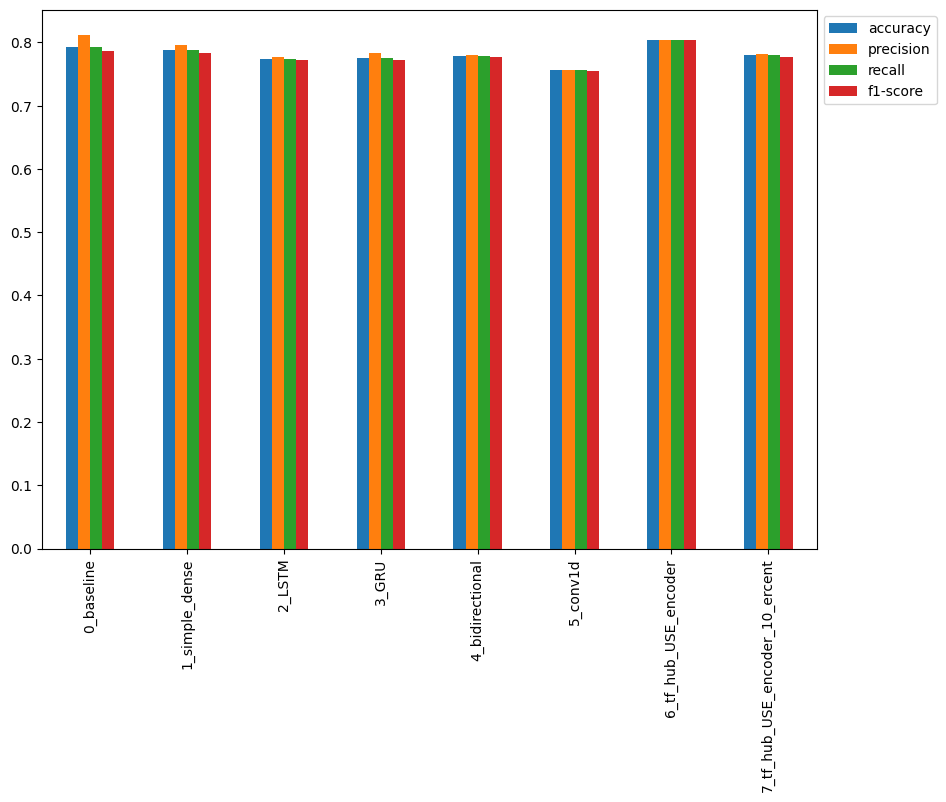

In [177]:
all_model_results.plot(kind="bar", figsize=(10,7)).legend(bbox_to_anchor=(1.0,1.0));

<Axes: >

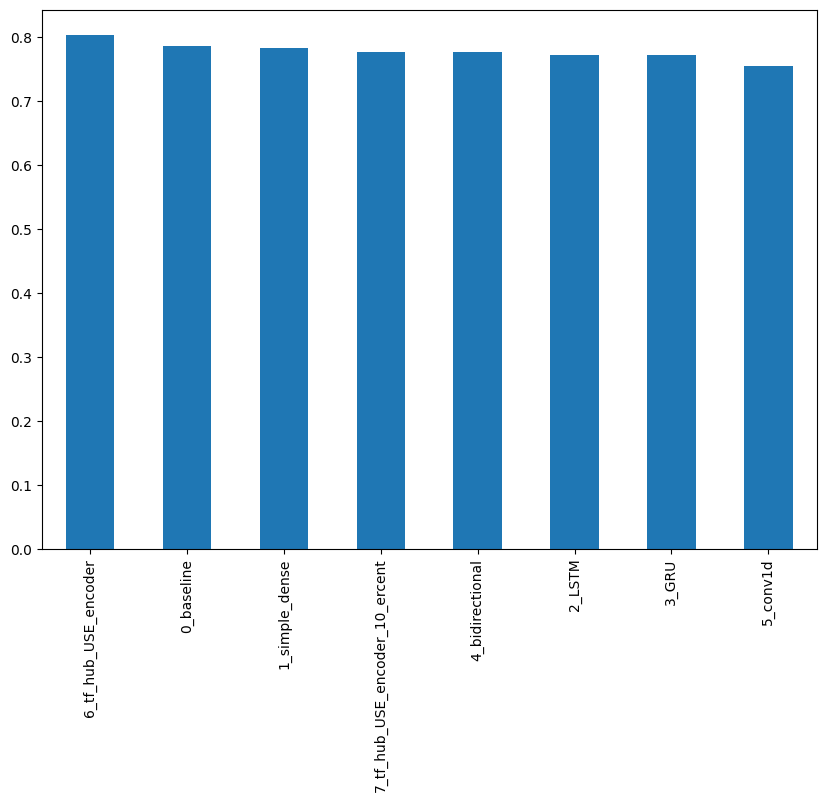

In [179]:
#Sort model results by f-1 score
all_model_results.sort_values('f1-score', ascending=False)["f1-score"].plot(kind='bar', figsize=(10,7))

## Saving and loading a saved model

There are 2 main formats to save a model in TF
* HDF5
* SavedModel Format

In [182]:
#Save the model_6
model_6.save("model_6.h5")

In [184]:
import tensorflow_hub as hub

In [191]:
#Load the model back in hdf5
model_6_reloaded= tf.keras.models.load_model("model_6.h5",
                                             custom_objects={"KerasLayer": hub.KerasLayer})

In [188]:
#How does the loaded model perform
model_6_reloaded.evaluate(val_sentences, val_labels)

24/24 [==============================] - 1s 11ms/step - loss: 0.4310 - accuracy: 0.8031


[0.4310455620288849, 0.8031495809555054]

In [189]:
model_6_results

{'accuracy': 80.31496062992126,
 'precision': 0.8029099795624137,
 'recall': 0.8031496062992126,
 'f1-score': 0.8028289227004518}

In [190]:
#Save to SavedModel Format
model_6.save("model_6_savedModel_format")

In [192]:
model_6_reloaded_savedmodel= tf.keras.models.load_model("model_6_savedModel_format")

In [193]:
#Evaluate SavedModel Format
model_6_reloaded_savedmodel.evaluate(val_sentences, val_labels)

24/24 [==============================] - 1s 20ms/step - loss: 0.4310 - accuracy: 0.8031


[0.4310455322265625, 0.8031495809555054]

## Finding the most wrong examples

* If our best model still isn't perfect...what examples is it getting wrongs....and what examples is it getting the most wrong

E.g. if a sample should have a label of 0 but our model predicts a prediction probab of 0.99 (eally close to 1) and vice versa.

In [194]:
#Download a pretrained model from google storage
!wget https://storage.googleapis.com/ztm_tf_course/08_model_6_USE_feature_extractor.zip

--2023-06-17 05:38:12--  https://storage.googleapis.com/ztm_tf_course/08_model_6_USE_feature_extractor.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.12.128, 172.217.194.128, 172.253.118.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.12.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 960779165 (916M) [application/zip]
Saving to: ‘08_model_6_USE_feature_extractor.zip’

08_model_6_USE_feat 100%[===================>] 916.27M  22.7MB/s    in 54s     

2023-06-17 05:39:06 (17.1 MB/s) - ‘08_model_6_USE_feature_extractor.zip’ saved [960779165/960779165]



In [195]:
!unzip 08_model_6_USE_feature_extractor.zip

Archive:  08_model_6_USE_feature_extractor.zip
   creating: 08_model_6_USE_feature_extractor/
   creating: 08_model_6_USE_feature_extractor/assets/
   creating: 08_model_6_USE_feature_extractor/variables/
  inflating: 08_model_6_USE_feature_extractor/variables/variables.data-00000-of-00001  
  inflating: 08_model_6_USE_feature_extractor/variables/variables.index  
  inflating: 08_model_6_USE_feature_extractor/saved_model.pb  


In [196]:
model_6_pretrained= tf.keras.models.load_model("08_model_6_USE_feature_extractor")
model_6_pretrained.evaluate(val_sentences, val_labels)

24/24 [==============================] - 1s 11ms/step - loss: 0.4272 - accuracy: 0.8163


[0.42723122239112854, 0.8162729740142822]

In [200]:
#Make predictions with the loaded model
model_6_pretrained_pred_probs=model_6_pretrained.predict(val_sentences)
model_6_pretraind_preds=tf.squeeze(tf.round(model_6_pretrained_pred_probs))
model_6_pretraind_preds[:10]

24/24 [==============================] - 0s 18ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [202]:
#Create dataframe with Validation sentences, validation labels, and best performing model predictions

val_df=pd.DataFrame({"text":val_sentences,
                     "target": val_labels,
                     "pred": model_6_pretraind_preds,
                     "pred_probs":tf.squeeze(model_6_pred_probs)})

In [203]:
val_df.head()

,text,target,pred,pred_probs
0,DFR EP016 Monthly Meltdown - On Dnbheaven 2015...,0,0.0,0.214601
1,FedEx no longer to transport bioterror germs i...,0,1.0,0.804084
2,Gunmen kill four in El Salvador bus attack: Su...,1,1.0,0.990365
3,@camilacabello97 Internally and externally scr...,1,0.0,0.217251
4,Radiation emergency #preparedness starts with ...,1,1.0,0.817875


In [208]:
most_wrong=val_df[val_df['target']!=val_df['pred']].sort_values('pred_probs',ascending=False)

In [209]:
most_wrong

,text,target,pred,pred_probs
31,? High Skies - Burning Buildings ? http://t.co...,0,1.0,0.945002
759,FedEx will no longer transport bioterror patho...,0,1.0,0.911364
628,@noah_anyname That's where the concentration c...,0,1.0,0.901439
49,@madonnamking RSPCA site multiple 7 story high...,0,1.0,0.898878
109,[55436] 1950 LIONEL TRAINS SMOKE LOCOMOTIVES W...,0,1.0,0.867195
...,...,...,...,...
408,@willienelson We need help! Horses will die!Pl...,1,0.0,0.053469
244,Reddit Will Now QuarantineÛ_ http://t.co/pkUA...,1,0.0,0.045702
411,@SoonerMagic_ I mean I'm a fan but I don't nee...,1,0.0,0.041197
38,Why are you deluged with low self-image? Take ...,1,0.0,0.038591
